In [1]:
import pandas as pd
import numpy as np
import matplotlib
from sklearn.cluster import KMeans
from collections import defaultdict

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [3]:
data = pd.read_csv("api_corpus.csv")
data
data = data.fillna("")

In [4]:
data.head(5)

,id,cve,project_name,description,mistakes
0,912,CVE-2013-6665,chromium,Heap-based buffer overflow in Chrome's resourc...,The vulnerabliity here was a pretty simple ove...
1,1457,CVE-2017-5093,chromium,"UI spoofing in Blink, a browser engine used in...","In my opinion, there were coding and design mi..."
2,1471,CVE-2017-5107,chromium,User information leak via SVG. By rendering a ...,
3,1425,CVE-2017-5060,chromium,URL spoofing in Omnibox. Certain Cyrillic char...,
4,957,CVE-2014-1748,chromium,The scrollbar rectangles for images were not p...,The main mistake that was made here was less o...


In [5]:
data.describe()

,id
count,1885.000000
mean,943.000000
std,544.296947
min,1.000000
25%,472.000000
50%,943.000000
75%,1414.000000
max,1885.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1885 non-null   int64 
 1   cve           1885 non-null   object
 2   project_name  1885 non-null   object
 3   description   1885 non-null   object
 4   mistakes      1885 non-null   object
dtypes: int64(1), object(4)
memory usage: 73.8+ KB


In [7]:
data.shape

(1885, 5)

In [8]:
print(type(data.mistakes))

<class 'pandas.core.series.Series'>


In [9]:
data['length_mistakes'] = data['mistakes'].str.len()

In [10]:
data['length_description'] = data['description'].str.len()

In [11]:
data.head(5)

,id,cve,project_name,description,mistakes,length_mistakes,length_description
0,912,CVE-2013-6665,chromium,Heap-based buffer overflow in Chrome's resourc...,The vulnerabliity here was a pretty simple ove...,578,495
1,1457,CVE-2017-5093,chromium,"UI spoofing in Blink, a browser engine used in...","In my opinion, there were coding and design mi...",567,326
2,1471,CVE-2017-5107,chromium,User information leak via SVG. By rendering a ...,,0,207
3,1425,CVE-2017-5060,chromium,URL spoofing in Omnibox. Certain Cyrillic char...,,0,290
4,957,CVE-2014-1748,chromium,The scrollbar rectangles for images were not p...,The main mistake that was made here was less o...,922,511


In [12]:
data.groupby('length_mistakes').describe().head(20)

id                                                    \
                  count         mean         std     min      25%     50%   
length_mistakes                                                             
0                1320.0   887.344697  540.146032     1.0   436.75   810.0   
61                  1.0   191.000000         NaN   191.0   191.00   191.0   
67                  1.0  1515.000000         NaN  1515.0  1515.00  1515.0   
80                  1.0  1110.000000         NaN  1110.0  1110.00  1110.0   
82                  1.0  1316.000000         NaN  1316.0  1316.00  1316.0   
88                  1.0  1762.000000         NaN  1762.0  1762.00  1762.0   
91                  1.0  1572.000000         NaN  1572.0  1572.00  1572.0   
99                  1.0  1603.000000         NaN  1603.0  1603.00  1603.0   
103                 1.0  1159.000000         NaN  1159.0  1159.00  1159.0   
108                 1.0  1129.000000         NaN  1129.0  1129.00  1129.0   
112                 1.0  1540.000000         NaN  1540.0  1540.00  1540.0   
128                 1.0  1169.000000         NaN  1169.0  1169.00  1169.0   
131                 1.0  1523.000000         NaN  1523.0  1523.00  1523.0   
134                 1.0  1585.000000         NaN  1585.0  1585.00  1585.0   
137                 1.0  1080.000000         NaN  1080.0  1080.00  1080.0   
142                 1.0  1764.000000         NaN  1764.0  1764.00  1764.0   
149                 1.0  1628.000000         NaN  1628.0  1628.00  1628.0   
151                 1.0  1309.000000         NaN  1309.0  1309.00  1309.0   
155                 1.0  1221.000000         NaN  1221.0  1221.00  1221.0   
157                 1.0  1420.000000         NaN  1420.0  1420.00  1420.0   

                                 length_description                       \
                     75%     max              count       mean       std   
length_mistakes                                                            
0                1398.25  1880.0             1320.0   14.82803  68.33255   
61                191.00   191.0                1.0  400.00000       NaN   
67               1515.00  1515.0                1.0  395.00000       NaN   
80               1110.00  1110.0                1.0  312.00000       NaN   
82               1316.00  1316.0                1.0  164.00000       NaN   
88               1762.00  1762.0                1.0  278.00000       NaN   
91               1572.00  1572.0                1.0  379.00000       NaN   
99               1603.00  1603.0                1.0  158.00000       NaN   
103              1159.00  1159.0                1.0  177.00000       NaN   
108              1129.00  1129.0                1.0  146.00000       NaN   
112              1540.00  1540.0                1.0  201.00000       NaN   
128              1169.00  1169.0                1.0  157.00000       NaN   
131              1523.00  1523.0                1.0  235.00000       NaN   
134              1585.00  1585.0                1.0  365.00000       NaN   
137              1080.00  1080.0                1.0   74.00000       NaN   
142              1764.00  1764.0                1.0  328.00000       NaN   
149              1628.00  1628.0                1.0  132.00000       NaN   
151              1309.00  1309.0                1.0  267.00000       NaN   
155              1221.00  1221.0                1.0  515.00000       NaN   
157              1420.00  1420.0                1.0  202.00000       NaN   

                                                    
                   min    25%    50%    75%    max  
length_mistakes                                     
0                  0.0    0.0    0.0    0.0  952.0  
61               400.0  400.0  400.0  400.0  400.0  
67               395.0  395.0  395.0  395.0  395.0  
80               312.0  312.0  312.0  312.0  312.0  
82               164.0  164.0  164.0  164.0  164.0  
88               278.0  278.0  278.0  278.0  278.0  
91               379.0 

/Users/prajwalkrishn/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of length over the description')

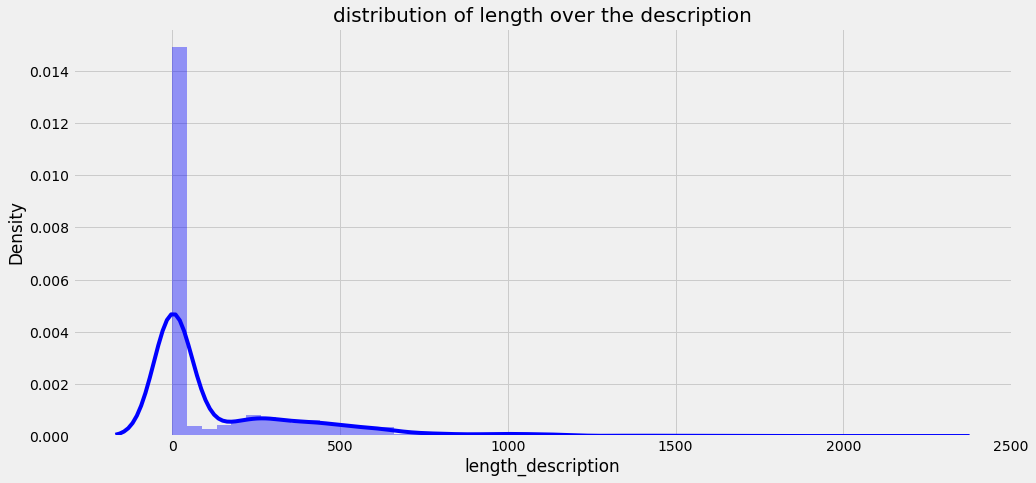

In [13]:
plt.rcParams['figure.figsize'] = (15,7)
sns.distplot(data.length_description,color='blue')
plt.title('distribution of length over the description', fontsize = 20)

/Users/prajwalkrishn/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of length over the mistakes')

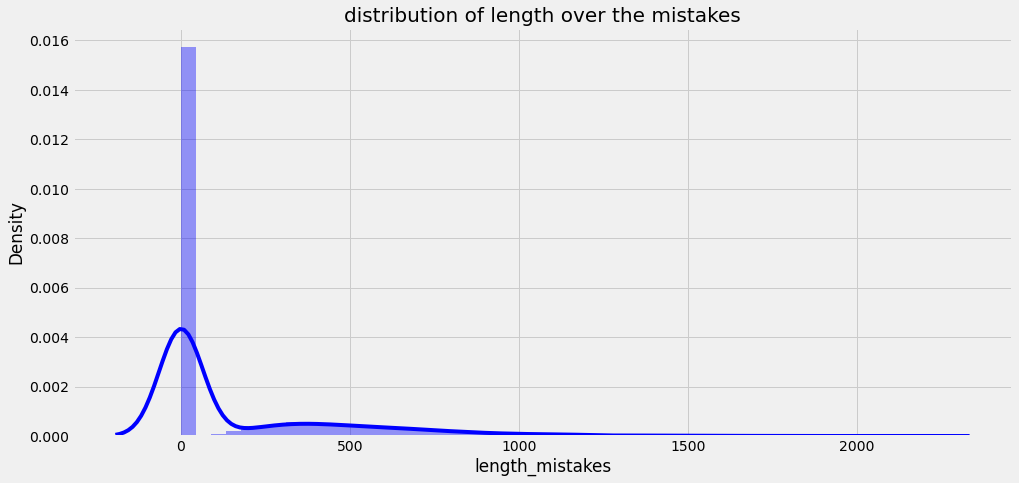

In [14]:
plt.rcParams['figure.figsize'] = (15,7)
sns.distplot(data.length_mistakes,color='blue')
plt.title('distribution of length over the mistakes', fontsize = 20)

Text(0.5, 1.0, 'WordCloud ')

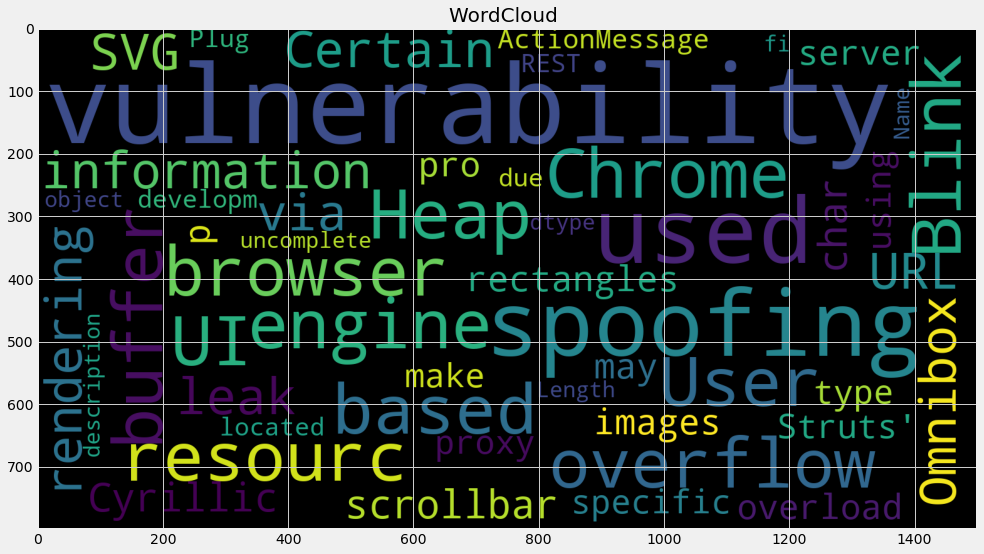

In [15]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 1500,
                     height= 800).generate(str(data.description))
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.title("WordCloud ", fontsize = 20)

Text(0.5, 1.0, 'WordCloud ')

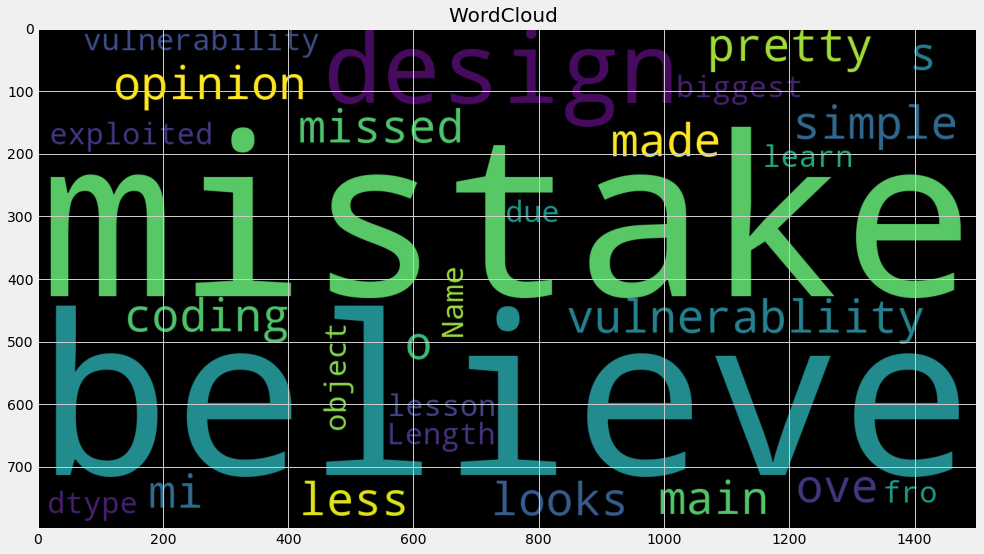

In [16]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 1500,
                     height= 800).generate(str(data.mistakes))
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.title("WordCloud ", fontsize = 20)

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

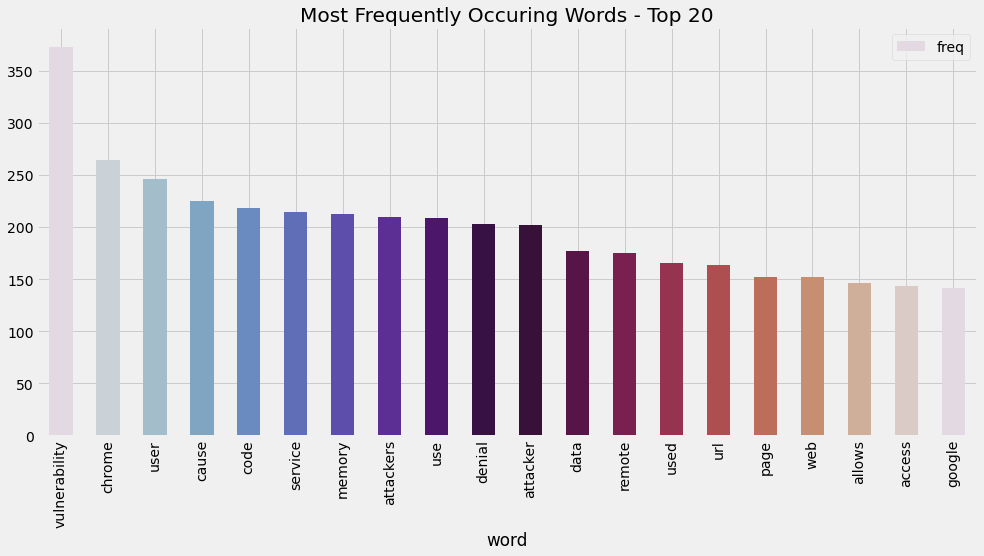

In [17]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data.description)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.twilight(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20")

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

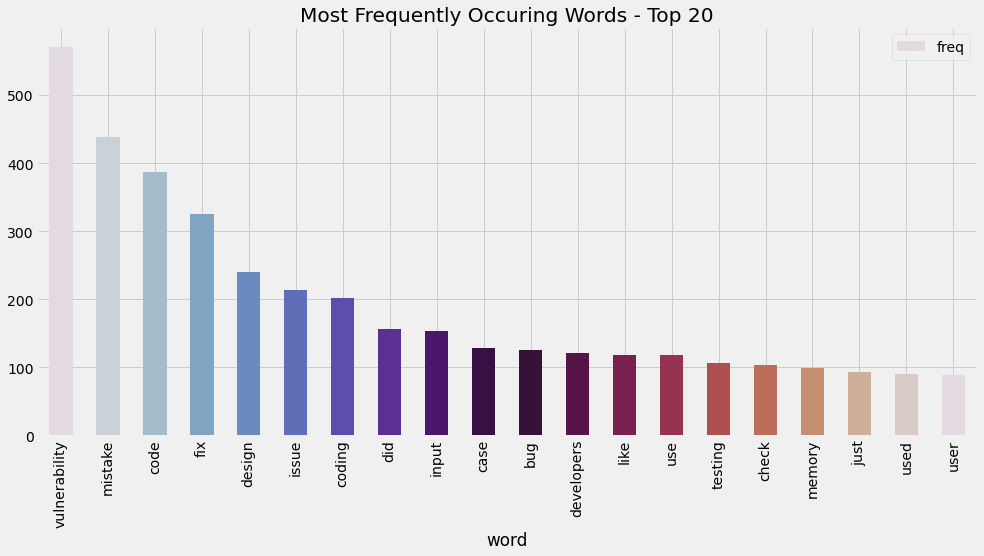

In [18]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data.mistakes)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.twilight(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20")

In [19]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/prajwalkrishn/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:

# cleaning the data

corpus = []

for i in range(0, 200):
    review = re.sub('[^a-zA-Z]', ' ', data['description'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [21]:

# cleaning the data

corpus = []

for i in range(0, 200):
    review = re.sub('[^a-zA-Z]', ' ', data['mistakes'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  1885 non-null   int64 
 1   cve                 1885 non-null   object
 2   project_name        1885 non-null   object
 3   description         1885 non-null   object
 4   mistakes            1885 non-null   object
 5   length_mistakes     1885 non-null   int64 
 6   length_description  1885 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 103.2+ KB


In [23]:

# vectorizing the data using Tfidf Vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features = 2000)
X = vectorizer.fit_transform(data['description'])

# getting the shape of X
print("Shape of X :", X.shape)

Shape of X : (1885, 2000)


In [24]:
true_k = 10
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(max_iter=100, n_clusters=10, n_init=1)

In [25]:
print("Top terms per cluster:")

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Y = vectorizer.transform(["In my opinion, there were coding and design mistakes due to overlooking a potential use of incorrectly validated inputs to manipulate modals and the fullscreen feature. The fix looks proper as it involved additional tests, deletion of previous code, additional checks for input validation, and the exiting of web-page initiated fullscreen when a dialog runs. It is interesting how even developers at top tech companies overlook validating input and serves as a prime example to always make sure to validate input, as it may violate the users' confidentality."])
prediction = model.predict(Y)
print(prediction)

Top terms per cluster:
Cluster 0:
 file
 extension
 appended
 leaving
 adding
 end
 checks
 tomcat
 run
 exploit
Cluster 1:
 mpm
 buffer
 read
 threaded
 refers
 using
 adjacent
 ports
 unix
 binding
Cluster 2:
 vulnerability
 chrome
 cause
 attackers
 service
 user
 denial
 memory
 code
 remote
Cluster 3:
 navigation
 took
 buttons
 forms
 unsafe
 actor
 graph
 sanitization
 expressions
 ognl
Cluster 4:
 free
 use
 embargoed
 pdfium
 apps
 v8
 webaudio
 chrome
 blink
 exfiltrate
Cluster 5:
 embargoed
 v8
 skia
 bounds
 overflow
 heap
 confusion
 read
 buffer
 write
Cluster 6:
 window
 clearing
 delay
 aka
 triggers
 proxy
 policy
 origin
 bypass
 using
Cluster 7:
 spoofing
 omnibox
 url
 embargoed
 spoof
 ui
 address
 blink
 inserting
 occurs
Cluster 8:
 pointer
 scoped
 management
 crash
 introducing
 automatic
 autofill
 translation
 infobar
 cleaned
Cluster 9:
 directory
 dot
 components
 hackers
 utilize
 just
 traversal
 space
 path
 containing
[2]
